Let's again consider the function of two variables that we saw before:

$$f(x, y) = -0.4+(x+15)/30 + (y+15)/40 + 0.5\sin(r), r = \sqrt{x^2+y^2}$$

We can plot this function as before:



In [13]:
%matplotlib inline  

from numpy import *
from numpy.linalg import norm

from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm
from matplotlib.ticker import LinearLocator, FormatStrFormatter
from matplotlib.pyplot import *
from numpy import *


def f(x, y):
    r = sqrt(x**2 + y**2)
    return -.4 + (x+15)/30. + (y+15)/40.+.5*sin(r)


x = arange(-15, 15, 0.25)
y = arange(-15, 15, 0.25)
X, Y = meshgrid(x, y)
R = sqrt(X**2 + Y**2)
Z = -.4 + (X+15)/30. + (Y+15)/40.+.5*sin(R)    

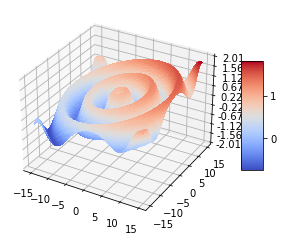

In [14]:
fig = figure(3)
ax = fig.gca(projection='3d')
surf = ax.plot_surface(X, Y, Z, rstride=1, cstride=1, cmap=cm.coolwarm,
                       linewidth=0, antialiased=False)
ax.set_zlim(-2.01, 2.01)

ax.zaxis.set_major_locator(LinearLocator(10))
ax.zaxis.set_major_formatter(FormatStrFormatter('%.02f'))

fig.colorbar(surf, shrink=0.5, aspect=5)
show()    

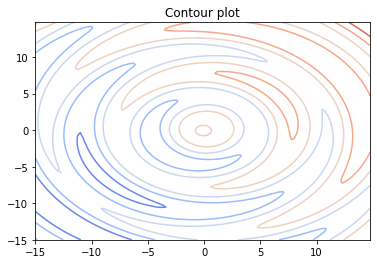

In [15]:
x = arange(-15, 15, 0.25)
y = arange(-15, 15, 0.25)
X, Y = meshgrid(x, y)
R = sqrt(X**2 + Y**2)
Z = -.4 + (X+15)/30. + (Y+15)/40.+.5*sin(R)

figure(1)
CS = contour(X, Y, Z, cmap=cm.coolwarm)
#clabel(CS, inline=1, fontsize=10)
title('Contour plot')

show()

Suppose we want to find a local minimum of this function. In order to do that, we need to compute its gradient.

Here is a sample computation:

$$\frac{\partial f}{\partial x} = 1/30 + 0.5\cos(r)\frac{\partial r}{\partial x}$$

$$\frac{\partial r}{\partial x} = (0.5(x^2+y^2)^{-1/2})(2 x)$$

We can get the following:

In [16]:
def drdx(x, y, r):
    return (.5*(x**2 + y**2)**-.5)*(2*x)

def drdy(x, y, r):
    return (.5*(x**2 + y**2)**-.5)*(2*y)
    
def dfdx(x, y):
    r = sqrt(x**2 + y**2)
    return 1/30. + .5*cos(r)*drdx(x, y, r)
    
def dfdy(x, y):
    r = sqrt(x**2 + y**2)
    return 1/40. + .5*cos(r)*drdy(x, y, r)
    
def gradf(x, y):
    return array([dfdx(x, y), dfdy(x, y)])        

Let's check that we got things right:

In [17]:
x = 0
y = 5
h = 0.001
(f(x+h, y)-f(x, y))/h

0.033347516444903746

In [18]:
dfdx(x, y)

0.03333333333333333

In [7]:
(f(x, y+h)-f(x, y))/h

0.16707080014188858

In [8]:
dfdy(x, y)

0.16683109273161315

Pretty close! We'd expect to get closer if we make $h$ smaller.

In [9]:
gradf(x, y)

array([0.03333333, 0.16683109])

That's just the same thing. We are now ready to implement gradient descent

In [19]:
# t = np.array([x, y])
def grad_descent2(f, gradf, init_t, alpha):
    EPS = 1e-5
    prev_t = init_t-10*EPS
    t = init_t.copy()
    
    max_iter = 1000
    iter = 0
    while norm(t - prev_t) > EPS and iter < max_iter:
        prev_t = t.copy()
        t -= alpha*gradf(t[0], t[1])
        print (iter, t, f(t[0], t[1]), gradf(t[0], t[1]))
        iter += 1
    
    return t

Let's try to run it, guided by the countour plot about where to start.

In [11]:
f(10., 8.)

1.1271253262964116

In [22]:
grad_descent2(f, gradf, array([15.0, 13.0]), 0.01)

0 [14.99762477 12.99798036] 1.719728239156449 [0.23851252 0.2028225 ]
1 [14.99523965 12.99595213] 1.7187459310143245 [0.23950458 0.20368282]
2 [14.9928446  12.99391531] 1.7177553703315 [0.24049877 0.20454499]
3 [14.99043962 12.99186986] 1.7167565048362103 [0.24149506 0.20540899]
4 [14.98802466 12.98981577] 1.7157492822588951 [0.24249341 0.20627478]
5 [14.98559973 12.98775302] 1.714733650339841 [0.24349382 0.20714236]
6 [14.98316479 12.9856816 ] 1.7137095568369805 [0.24449624 0.20801169]
7 [14.98071983 12.98360148] 1.712676949533829 [0.24550065 0.20888274]
8 [14.97826482 12.98151265] 1.711635776247574 [0.24650701 0.2097555 ]
9 [14.97579975 12.9794151 ] 1.7105859848373117 [0.24751531 0.21062994]
10 [14.9733246 12.9773088] 1.7095275232124418 [0.2485255  0.21150602]
11 [14.97083935 12.97519374] 1.7084603393412001 [0.24953756 0.21238373]
12 [14.96834397 12.9730699 ] 1.7073843812593548 [0.25055146 0.21326304]
13 [14.96583845 12.97093727] 1.7062995970790458 [0.25156717 0.21414392]
14 [14.9633

439 [13.48957222 11.70726675] 0.7998203435072173 [0.24110219 0.20531746]
440 [13.4871612  11.70521357] 0.7988195830708382 [0.24010234 0.20445032]
441 [13.48476017 11.70316907] 0.7978271740822241 [0.2391046 0.203585 ]
442 [13.48236913 11.70113322] 0.7968430639016918 [0.23810902 0.20272155]
443 [13.47998804 11.699106  ] 0.7958671998912592 [0.23711561 0.20185998]
444 [13.47761688 11.6970874 ] 0.794899529422167 [0.23612439 0.20100031]
445 [13.47525564 11.6950774 ] 0.7939399998822654 [0.2351354  0.20014256]
446 [13.47290428 11.69307597] 0.7929885586832639 [0.23414866 0.19928677]
447 [13.4705628  11.69108311] 0.7920451532678175 [0.2331642  0.19843293]
448 [13.46823116 11.68909878] 0.7911097311164864 [0.23218203 0.19758109]
449 [13.46590933 11.68712297] 0.7901822397545442 [0.23120218 0.19673126]
450 [13.46359731 11.68515565] 0.7892626267586483 [0.23022467 0.19588345]
451 [13.46129507 11.68319682] 0.788350839763371 [0.22924953 0.19503769]
452 [13.45900257 11.68124644] 0.7874468264675853 [0.228

889 [13.03177676 11.32753552] 0.6926170715309695 [0.02879717 0.02105706]
890 [13.03148879 11.32732495] 0.6926043763515095 [0.02866304 0.02094046]
891 [13.03120216 11.32711554] 0.6925918068989272 [0.02852958 0.02082444]
892 [13.03091686 11.3269073 ] 0.6925793619185812 [0.02839679 0.02070899]
893 [13.0306329  11.32670021] 0.6925670401683433 [0.02826467 0.02059413]
894 [13.03035025 11.32649427] 0.6925548404184734 [0.0281332  0.02047984]
895 [13.03006892 11.32628947] 0.6925427614514961 [0.0280024  0.02036613]
896 [13.02978889 11.32608581] 0.6925308020620796 [0.02787225 0.02025298]
897 [13.02951017 11.32588328] 0.6925189610569139 [0.02774275 0.02014039]
898 [13.02923274 11.32568188] 0.6925072372545924 [0.0276139  0.02002837]
899 [13.0289566  11.32548159] 0.6924956294854923 [0.0274857  0.01991691]
900 [13.02868175 11.32528242] 0.692484136591658 [0.02735813 0.01980601]
901 [13.02840817 11.32508436] 0.6924727574266853 [0.02723121 0.01969566]
902 [13.02813585 11.32488741] 0.6924614908556062 [0.

array([13.00686636, 11.31025666])